<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
In The Name of God
</font>
<br>
<img src="https://logoyar.com/content/wp-content/uploads/2021/04/sharif-university-logo.png" alt="University Logo" width="150" height="150">
<br>
<font face="Times New Roman" size=4 align=center>
Sharif University of Technology - Department of Electrical Engineering
</font>
<br>
<font color="#008080" size=6>
Deep Generative Models
</font>

<hr/>
<font color="#800080" size=5>
Assignment 2: Variational Autoencoders
<br>
</font>
<font size=5>
Instructor: Dr. S. Amini
<br>
</font>
<font size=4>
Fall 2024
<br>
</font>
<font face="Times New Roman" size=4>
Deadline: Month day at 23:55
</font>
<hr>
</div></font>

In [1]:
name = 'amirmahdi meighani'
std_id = '400105274'

In [35]:
import numpy as np
from tqdm import trange
from matplotlib import pyplot as plt

import torch
from torch import nn
import torch.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, ConcatDataset
import matplotlib.cm as cm

In [3]:
# Get cpu, gpu or mps device for training.
device = ("cuda" if torch.cuda.is_available()
          else "mps" if torch.backends.mps.is_available()
          else "cpu")
print(f"Using {device} device")

Using cuda device


# Dataset (5 points)

Download the MNIST dataset and merge the train and test datasets for training the generative model.

In [4]:
# TODO: Define transformations
transform = transforms.Compose([transforms.ToTensor()])

# Load train and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.6MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 481kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 10.1MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Merge the two datasets to train the model on the images.

In [5]:
# TODO: Concatenate train and test datasets
merged_dataset = ConcatDataset([train_dataset, test_dataset])
merged_loader = DataLoader(merged_dataset,batch_size=32, shuffle=True)

print(f'The size of the merged dataset is {len(merged_loader.dataset)}')

The size of the merged dataset is 70000


# EDA (10 points)

Plot the distribution of each class in the dataset.

In [6]:
def plot_class_distribution(dataloader):
    # TODO: Initialize a dictionary to count occurrences of each class
    ans = {}
    for i in range(10):
        ans[i] = 0

    # TODO: Iterate through the DataLoader to count the labels
    # print(dataloader)
    for i in dataloader:
        for class_item in i[1]:
            ans[class_item.item()] += 1

    print(ans)
    # TODO: Plot the histogram

    # Extract keys and values
    keys = list(ans.keys())
    values = list(ans.values())

    # Plot histogram
    plt.figure(figsize=(10, 5))
    plt.bar(keys, values)
    plt.xlabel('label')
    plt.ylabel('count')

    plt.show()


{0: 6903, 1: 7877, 2: 6990, 3: 7141, 4: 6824, 5: 6313, 6: 6876, 7: 7293, 8: 6825, 9: 6958}


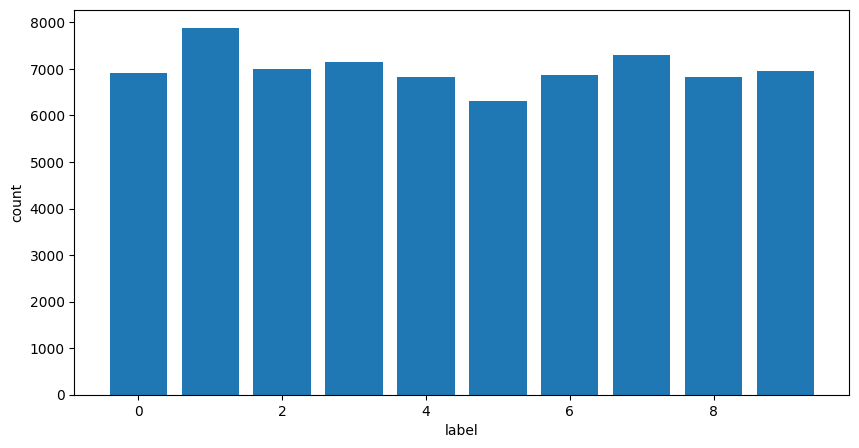

In [7]:
plot_class_distribution(merged_loader)

Plot the average of each class in the dataset.

In [8]:
def plot_class_averages(dataloader):
    # TODO: Iterate over the DataLoader to accumulate sums and counts
    class_count = {}
    class_sum = {}

    for i in range(10):
        class_count[i] = 0
        class_sum[i] = torch.zeros(1,28,28)


    for batch in dataloader:
        for i in range(len(batch[0])):
            class_count[batch[1][i].item()] += 1
            class_sum[batch[1][i].item()] += batch[0][i]


    # TODO: Calculate the average images for each class
    averages = {}
    for i in range(10):
        averages[i] = class_sum[i] / class_count[i]
    print(class_sum[0])
    print('eeeeeeeeeeeeeeeeeeeee')
    print(averages[0])

    # TODO: Plot the averages
    plt.figure(figsize=(20, 10))
    for i in range(10):
        image, label = (averages[i] , i)
        image = image.squeeze()  # Remove the channel dimension
        plt.subplot(1, 10, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()



tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 5.0196e-01, 9.9216e-01, 4.0784e-01, 0.0000e+00,
          3.5294e-01, 9.6471e-01, 4.5882e-01, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
          0.0000e+00, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1373e-01, 3.9216e-02,
          0.0000e+00, 3.3333e-01, 7.8431e-01, 1.7255e-01, 0.0000e+00,
          0.0000e+00, 3.6078e-01, 1.1059e+00, 1.8392e+00, 7.6863e-

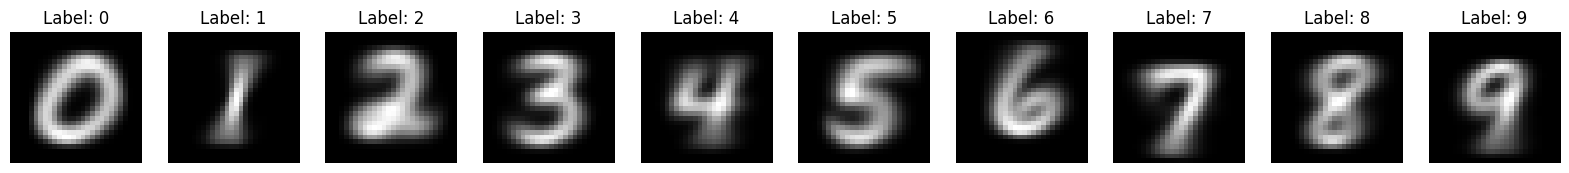

In [9]:
plot_class_averages(merged_loader)

# Variational Autoencoder (25 points)

In [22]:
class VAE(nn.Module):

    def __init__(self, latent_dim=2):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.fc1 = nn.Linear(784, 400)  # input size for MNIST is 28x28=784
        self.fc2_mean = nn.Linear(400, latent_dim)
        self.fc2_logvar = nn.Linear(400, latent_dim)

        # Decoder
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 784)

    def encode(self, x):
        h1 = torch.nn.functional.relu(self.fc1(x))
        mean = self.fc2_mean(h1)
        logvar = self.fc2_logvar(h1)
        return mean, logvar

    def reparameterization(self, mean, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        h3 = torch.nn.functional.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        # print('start')
        # print(x.view(-1, 784))
        mean, logvar = self.encode(x.view(-1, 784))
        # print(mean)
        # print(logvar)
        z = self.reparameterization(mean, logvar)
        # print(z)
        ans = self.decode(z)
        ans = ans.view(-1, 1, 28, 28)
        # print(ans)
        # print('end')
        return ans, mean, logvar, z


In [26]:
model = VAE().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
losses = []

# Training (20 points)

Define the loss function for training the VAE. The loss functions should be a combination of the reconstruction loss and the KL-divergence loss. You can choose to increase the weight of these losses to achieve better results.

In [27]:

def loss_function(x, x_hat, mean, log_var, kl_weight = 1):
    kl_divergence = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())

    # print(x_hat)
    # print('asdfasdf')
    # print(x)
    reconstruction_loss = torch.nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    ans = kl_weight * kl_divergence + reconstruction_loss
    # print(ans)
    return  ans

Now you must train your network using the loss function you defined earlier. Make sure to plot and monitor the training loss over epochs.

In [30]:
def plot_losses(losses):
    plt.figure(figsize=(10, 5))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    plt.show()


def train(model, optimizer, n_epochs=50, losses=losses):
    model.train()
    losses = []
    for epoch in range(n_epochs):
        train_loss = 0
        for batch_idx, (data, _) in enumerate(merged_loader):

            data = data.to(device)
            optimizer.zero_grad()
            reconstructed_x, mean, logvar,_ = model(data)

            loss = loss_function(data, reconstructed_x, mean, logvar)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= len(merged_loader.dataset)
        losses.append(train_loss)

        print(f"Epoch {epoch + 1}, Loss: {train_loss:.4f}")

    return losses


Epoch 1, Loss: 147.2483
Epoch 2, Loss: 147.0661
Epoch 3, Loss: 147.0612
Epoch 4, Loss: 146.9812
Epoch 5, Loss: 146.8800
Epoch 6, Loss: 146.8256
Epoch 7, Loss: 146.7302
Epoch 8, Loss: 146.6896
Epoch 9, Loss: 146.6531
Epoch 10, Loss: 146.5574
Epoch 11, Loss: 146.5165
Epoch 12, Loss: 146.4635
Epoch 13, Loss: 146.3808
Epoch 14, Loss: 146.3529
Epoch 15, Loss: 146.2404
Epoch 16, Loss: 146.2335
Epoch 17, Loss: 146.1785
Epoch 18, Loss: 146.1421
Epoch 19, Loss: 146.0300
Epoch 20, Loss: 145.9798
Epoch 21, Loss: 145.9554
Epoch 22, Loss: 145.9182
Epoch 23, Loss: 145.8177
Epoch 24, Loss: 145.9114
Epoch 25, Loss: 145.7831
Epoch 26, Loss: 145.7635
Epoch 27, Loss: 145.6828
Epoch 28, Loss: 145.6993
Epoch 29, Loss: 145.5999
Epoch 30, Loss: 145.5877


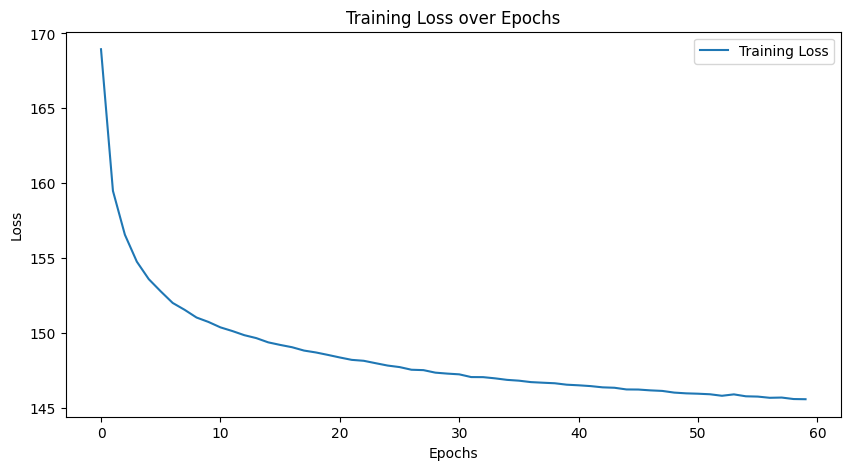

In [50]:
losses += train(model, optimizer, 30, losses)

plot_losses(losses)

# The Encoder (20 points)

Let's first take a look at the encoder. Start by visualizing the latent dimension for the merged dataset.

In [51]:
def visualize(vae, dataloader, batch_count=30, title='Latent Space Visualization'):
    labels = []
    latents = []
    with torch.no_grad():
        for x, lbl in dataloader:
            _, _, _, z = vae(x.to(device))
            latents.append(z)
            labels.append(lbl)

    latents = torch.cat(latents).to('cpu')
    labels = torch.cat(labels).to('cpu')

    print(latents)
    print(labels)


    colors = cm.rainbow(np.linspace(0, 1, 10))

    for i in range(10):
        idxs = [j for j, label in enumerate(labels) if label == i]
        plt.scatter(latents[idxs, 0], latents[idxs, 1], color=colors[i], label=f'Class {i}', alpha=0.6)

    plt.title(title)
    plt.legend()
    plt.show()

tensor([[-0.0926,  0.2257],
        [ 0.2071,  1.9476],
        [-0.0218,  0.0209],
        ...,
        [-0.1644,  2.4195],
        [-2.4766,  0.4372],
        [ 0.1369,  0.6726]])
tensor([3, 9, 2,  ..., 7, 1, 3])


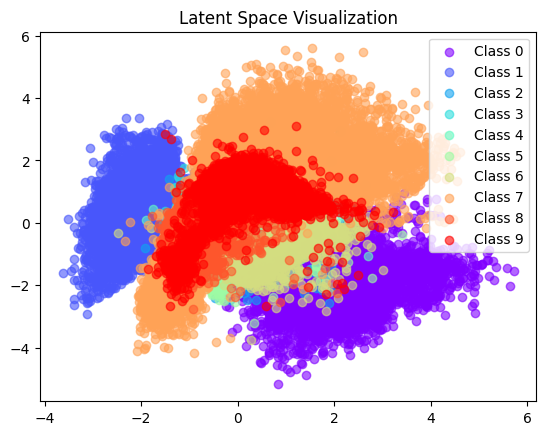

In [52]:
visualize(model, merged_loader)

Imagine if the input data for the encoder followed a very different distribution. Invert the images in the original datset and plot the latent dimension once more to show the difference.

In [53]:
def inverted_visualize(vae, dataloader, batch_count=30, title='Latent Space Visualization'):
    # TODO: Iterate over the inverted dataloader and plot the latent space

    labels = []
    latents = []
    with torch.no_grad():
        for x, lbl in dataloader:
            x = 1.0 - x
            _, _, _, z = vae(x.to(device))
            latents.append(z)
            labels.append(lbl)

    latents = torch.cat(latents).to('cpu')
    labels = torch.cat(labels).to('cpu')

    print(latents)
    print(labels)


    colors = cm.rainbow(np.linspace(0, 1, 10))

    for i in range(10):
        idxs = [j for j, label in enumerate(labels) if label == i]
        plt.scatter(latents[idxs, 0], latents[idxs, 1], color=colors[i], label=f'Class {i}', alpha=0.6)

    plt.title(title)
    plt.legend()
    plt.show()

tensor([[-0.1940,  0.1060],
        [-0.1557,  0.0551],
        [-0.1693,  0.0060],
        ...,
        [-0.1884,  0.0655],
        [-0.1384,  0.0748],
        [-0.1939,  0.0364]])
tensor([4, 4, 5,  ..., 1, 1, 3])


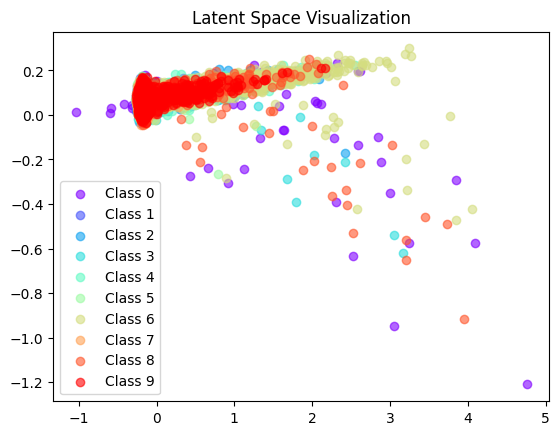

In [54]:
inverted_visualize(model, merged_loader)

Explain how the difference in the latent dimension allows us to detect data samples that don't follow the original distribution. How can this difference be used for anomaly detection? If we had used an autoencoder instead, what would be our observation then?

*`Your Answer:`*


we see that in real samples the classes were distinguished really well but in inverted one the classes were not distinguishable usinng latent variable. that means we trainted the data using that dataset and now it knows how to create a good latent var for samples of that data. but when we give it a new sample that was not in our data set it cant create a good z so it cant pridict its label. we can use this behavur for anomaly detection and find samples that dont come from healthy data.

if a standard autoencoder were used, it would not impose a probabilistic structure on the latent var, so it would be more difficult to distinguish between normal and bad data. for this task vae is better

# The Decoder (20 points)

In this section we are going to test the properties of the decoder. First implement a function to create samples based on the input mean and variance.

In [55]:
def generate_digit(mean, var):
    # TODO: Return the generated image
    mean = torch.tensor(mean, device=device)
    var = torch.tensor(var, device=device)

    std = torch.sqrt(var)
    epsilon = torch.randn_like(std)
    z = mean + epsilon * std

    with torch.no_grad():
        generated_image = model.decode(z.unsqueeze(0))

    return generated_image.squeeze(0)

Now using this function plot the decoded output sampled from a uniform distribution from -1 to +1.

In [56]:
def plot_latent_space(model, scale=1.0, n=25, digit_size=28, figsize=15):
    # TODO: Display a n*n 2D manifold of digits and construct a grid

    figure = plt.figure(figsize=(figsize, figsize))
    grid_x = torch.linspace(-scale, scale, n)
    grid_y = torch.linspace(-scale, scale, n)

    # TODO: Generate images for the grid


    with torch.no_grad():
        for i, yi in enumerate(grid_y):
            for j, xi in enumerate(grid_x):
                mean = [xi.item(), yi.item()]
                var = [0.001, 0.001]

                generated_image = generate_digit(mean, var)
                generated_image = generated_image.view(digit_size, digit_size).cpu().numpy()

                plt.subplot(n, n, i * n + j + 1)
                plt.imshow(generated_image, cmap="gray")
                plt.axis("off")

    # TODO: Display the results
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()


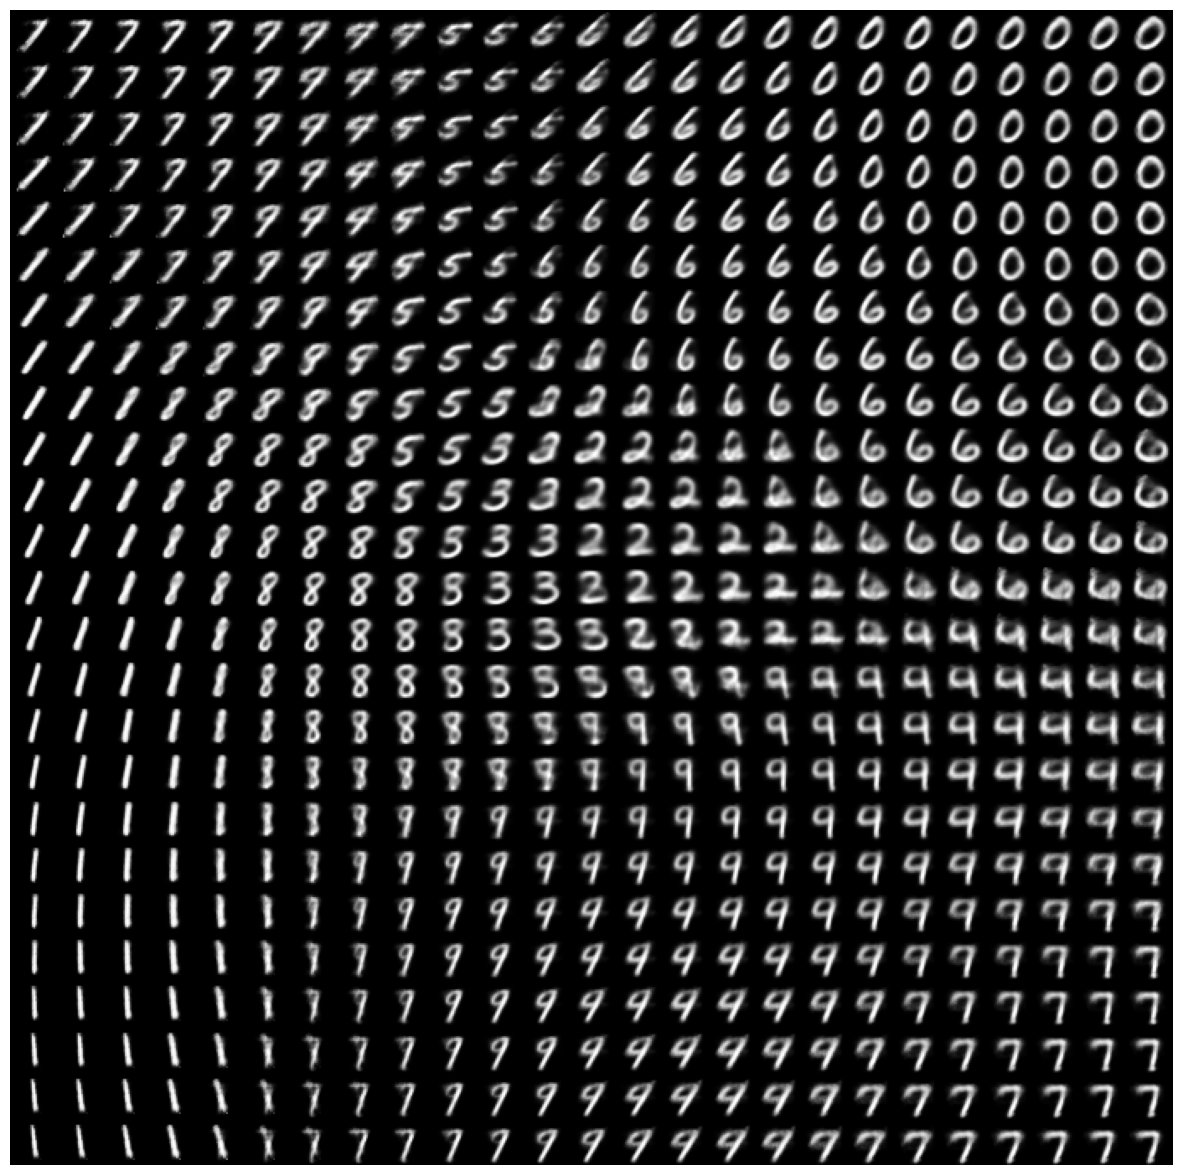

In [57]:
plot_latent_space(model,scale=2)

What happens when you sample from regions outside the aformentioned space? Why? What could we expect if the network was not a variational autoencoder, but a simple autoencoder instead?

*`Your Answer:`*


When sampling from regions outside the learned latent space of a vae we see that outputs are mostly meaning less because the vae models the probability distribution of the training data, and such samples do not corespond to any meaningful features. we see that even a simple autoencoder also struggles in this situations as it compresses data without enforcing a specific distribution. While it may still produce outputs when sampling outside the latent space, these outputs tend to be arbitrary and meaningless. Thus, both models fail to generate coherent results outside the learned space, but vae's probabilistic framework offers a clearer rationale for the observed problem.